<a href="https://colab.research.google.com/github/HARASEON/Deep_Learning_tensorflow/blob/main/Day4_3%EA%B0%9C_%EC%82%AC%EC%A7%84_%EB%B6%84%EB%A5%98%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3개 사진 분류하기
* 이미지 분류 모델의 손실 최소화하기
  1. **적절한 손실 함수 선택**: 이미지 분류 문제에서는 일반적으로 교차 엔트로피 손실(Cross-Entropy Loss) 함수를 사용합니다. 이 함수는 모델이 예측한 클래스와 실제 클래스 간의 차이를 계산하는 방식으로 손실을 계산합니다.

  2. **학습률(Learning rate) 조정**: 학습률은 모델이 손실을 최소화하기 위해 파라미터 값을 조정하는 속도를 결정합니다. 적절한 학습률을 설정하여 모델 학습을 안정적으로 진행할 수 있습니다.

  3. **데이터 증강(Data Augmentation)**: 데이터 증강은 이미지 데이터를 다양한 방법으로 변형하여 모델이 더 많은 패턴을 학습하도록 하는 방법입니다. 이를 통해 모델이 더 일반화된 패턴을 학습하도록 하여 과적합을 방지하고, 손실을 최소화할 수 있습니다.-> 사용! "ImageDataGenerator"

  4. **정규화(Regularization)**: L1, L2 정규화와 같은 방법을 사용하여 모델이 복잡한 구조를 가지는 것을 방지하고, 일반화된 모델을 만들 수 있습니다.

  5. **하이퍼파라미터(Hyperparameter) 튜닝**: 모델의 하이퍼파라미터를 조정하여 최적의 성능을 얻을 수 있습니다. 하이퍼파라미터 튜닝은 실험을 통해 최적의 값을 찾아내는 과정입니다.

  6. **이상치(Outlier) 처리**: 모델이 이상치에 민감하게 반응하는 것을 방지하기 위해, 이상치를 제거하거나 다른 방법으로 처리하는 것이 필요할 수 있습니다.


In [1]:
!pip install tensorflow==2.10.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.1/578.1 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 53.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 69.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 90.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 40.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 87.4 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflo

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


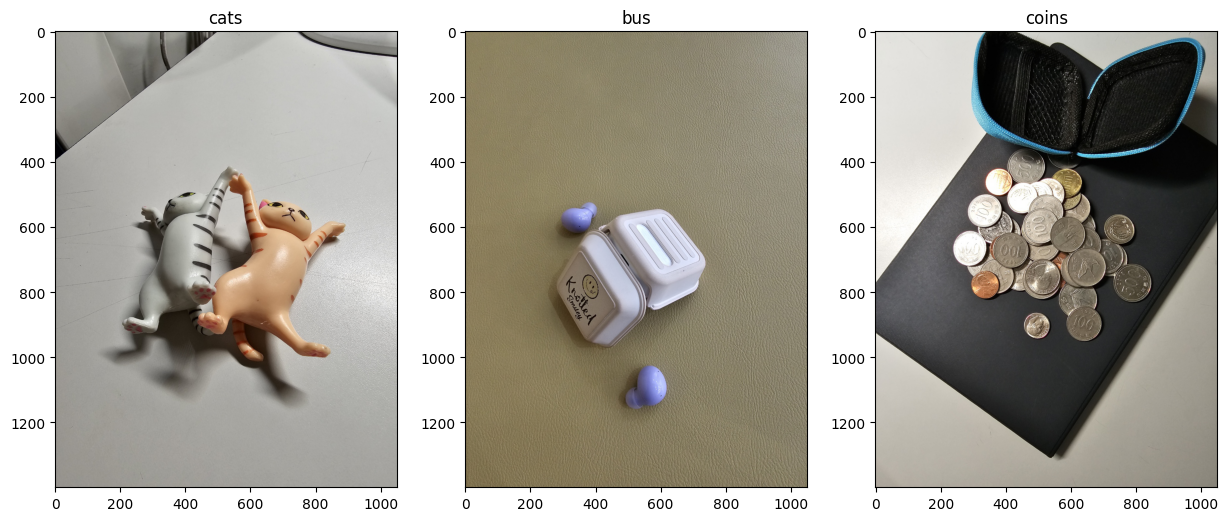

In [23]:
# 이미지들
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def main():
  cats = mpimg.imread('/content/drive/MyDrive/train/cats/KakaoTalk_20230420_193652404_01.jpg')

  buds = mpimg.imread('/content/drive/MyDrive/train/buds/KakaoTalk_20230420_193750992_01.jpg')

  coins = mpimg.imread('/content/drive/MyDrive/train/coins/KakaoTalk_20230420_193719386_01.jpg')
  
  plt.figure(figsize=(15,10))
  plt.subplot(1,3,1)
  plt.title('cats')
  plt.imshow(cats)
  plt.subplot(1,3,2)
  plt.title('bus')
  plt.imshow(buds)
  plt.subplot(1,3,3)
  plt.title('coins')
  plt.imshow(coins)

if __name__ == '__main__':
  main()

In [3]:
import tensorflow as tf
import urllib
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.applications import VGG16

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)
validation_datagen = ImageDataGenerator(rescale = 1./255)

TRAINING_DIR = '/content/drive/MyDrive/train'
train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size = (300, 300),
    class_mode = 'categorical'
)
VALIDATION_DIR = '/content/drive/MyDrive/test'
validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size = (300,300),
    class_mode = 'categorical'
)

transfer_model = VGG16(weights='imagenet', include_top=False, input_shape=(300, 300, 3))
transfer_model.trainable = False
model = Sequential([
    transfer_model,
    Flatten(),
    Dense(512, activation = 'relu'),
    Dense(3, activation = 'softmax')])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
checkpoint_path = 'my_checkpoint.ckpt'
checkpoint = ModelCheckpoint(checkpoint_path,
                             save_best_only =True,
                             save_weights_only = True,
                             monitor = 'val_loss',
                             verbose =1)
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 10)
history = model.fit(train_generator,
                    validation_data = (validation_generator),
                    epochs = 100,
                    callbacks=[checkpoint, early_stopping])
model.save("cats-buds-coins.h5")

Found 45 images belonging to 3 classes.
Found 15 images belonging to 3 classes.
58889256/58889256 [==============================] - 4s 0us/step
Epoch 1/100
2/2 [==============================] - ETA: 0s - loss: 5.4967 - accuracy: 0.3333 
Epoch 1: val_loss improved from inf to 37.86480, saving model to my_checkpoint.ckpt
2/2 [==============================] - 38s 19s/step - loss: 5.4967 - accuracy: 0.3333 - val_loss: 37.8648 - val_accuracy: 0.3333
Epoch 2/100
2/2 [==============================] - ETA: 0s - loss: 33.7502 - accuracy: 0.3333
Epoch 2: val_loss improved from 37.86480 to 10.72974, saving model to my_checkpoint.ckpt
2/2 [==============================] - 4s 2s/step - loss: 33.7502 - accuracy: 0.3333 - val_loss: 10.7297 - val_accuracy: 0.3333
Epoch 3/100
2/2 [==============================] - ETA: 0s - loss: 3.2127 - accuracy: 0.6667
Epoch 3: val_loss improved from 10.72974 to 5.32070, saving model to my_checkpoint.ckpt
2/2 [==============================] - 5s 4s/step - loss

# ChatGPT
* prompt: modify thiscode to get val_loss under 0.1 -> success! 0.0063
* response: 
1.The code imports the necessary libraries and modules for building and training a convolutional neural network (CNN) for image classification using TensorFlow and Keras.

2. The code sets up an ImageDataGenerator object to generate augmented training and validation data sets from image directories. The data augmentation techniques used in this code include rotation, width and height shifts, shearing, zooming, horizontal and vertical flipping, and brightness adjustment.

3. The code loads the pre-trained VGG16 model from the Keras applications module and freezes all its layers except for the final fully connected layers. This allows the transfer learning approach, where the pre-trained model is used as a feature extractor for the new classification problem.

4. The code builds a sequential model by adding the VGG16 model as the base layer and adding two fully connected layers on top of it. The output of the last layer is the softmax function, which gives the predicted probability distribution of the classes.

5. The code compiles the model using the Adam optimizer and the categorical cross-entropy loss function, and trains the model using the augmented training data set and the validation data set. The training process is monitored using callbacks that save the best model weights and stop the training if the validation loss does not improve after a certain number of epochs. Finally, the trained model is saved as an h5 file for later use.

In [4]:
import tensorflow as tf
import urllib
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.applications import VGG16

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    vertical_flip = True,  # new augmentation
    brightness_range = [0.5, 1.5],  # new augmentation
    fill_mode = 'nearest'
)
validation_datagen = ImageDataGenerator(rescale = 1./255)

TRAINING_DIR = '/content/drive/MyDrive/train'
train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size = (300, 300),
    class_mode = 'categorical'
)
VALIDATION_DIR = '/content/drive/MyDrive/test'
validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size = (300,300),
    class_mode = 'categorical'
)

transfer_model = VGG16(weights='imagenet', include_top=False, input_shape=(300, 300, 3))
transfer_model.trainable = False
model = Sequential([
    transfer_model,
    Flatten(),
    Dense(512, activation = 'relu'),
    Dense(3, activation = 'softmax')])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
checkpoint_path = 'my_checkpoint.ckpt'
checkpoint = ModelCheckpoint(checkpoint_path,
                             save_best_only =True,
                             save_weights_only = True,
                             monitor = 'val_loss',
                             verbose =1)
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 10)
history = model.fit(train_generator,
                    validation_data = (validation_generator),
                    epochs = 100,
                    callbacks=[checkpoint, early_stopping])
model.save("cats-buds-coins.h5")


Found 45 images belonging to 3 classes.
Found 15 images belonging to 3 classes.
Epoch 1/100
2/2 [==============================] - ETA: 0s - loss: 11.3559 - accuracy: 0.3778
Epoch 1: val_loss improved from inf to 6.64126, saving model to my_checkpoint.ckpt
2/2 [==============================] - 7s 3s/step - loss: 11.3559 - accuracy: 0.3778 - val_loss: 6.6413 - val_accuracy: 0.3333
Epoch 2/100
2/2 [==============================] - ETA: 0s - loss: 5.0808 - accuracy: 0.4222
Epoch 2: val_loss improved from 6.64126 to 4.86109, saving model to my_checkpoint.ckpt
2/2 [==============================] - 4s 3s/step - loss: 5.0808 - accuracy: 0.4222 - val_loss: 4.8611 - val_accuracy: 0.6667
Epoch 3/100
2/2 [==============================] - ETA: 0s - loss: 5.4863 - accuracy: 0.6444
Epoch 3: val_loss did not improve from 4.86109
2/2 [==============================] - 4s 3s/step - loss: 5.4863 - accuracy: 0.6444 - val_loss: 6.5573 - val_accuracy: 0.4667
Epoch 4/100
2/2 [===========================